# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

### №1
- Формула получения параметров линейной модели (метод наименьших квадратов в явном виде):

$$ \hat{\theta} = (X^{T}X)^{-1}X^{T}Y $$

- Здесь:

$$ 	
\mathbf{X}=\begin{bmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix}
\quad
\mathbf{Y}=\begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix}
$$

- Посчитаем: $ (X^{T}X)^{-1}$:

$$ (X^{T}X) = \sum_{i=1}^{n} (x_{i})^{2} $$

$$ (X^{T}X)^{-1} = \frac{1}{\sum_{i=1}^{n} (x_{i})^{2}} $$

- Теперь посчитаем правую часть: $ X^{T}Y$:

$$ X^{T}Y = \sum_{i=1}^{n} x_{i}y_{i} $$

- По итогу, получаем:

$$ \hat{\theta} = \frac{\sum_{i=1}^{n} x_{i}y_{i}}{\sum_{i=1}^{n} (x_{i})^{2}} $$

### №2

$ F(\theta) = \frac{1}{n}(\lvert\lvert X\theta - Y \rvert\rvert)^{2} \newline$

Задача: $F(\theta) \rightarrow min$

$\newline\nabla F(\theta) = -\frac{1}{n}2X^{T}Y + 2X^{T}X\theta = \frac{2}{n}X^{T}(X\theta - Y) \newline$

$ \theta^{\prime} $ - параметры с прошлой итерации

$ \alpha $ - learning rate (скорость обучения / размер шага)


**GD_step($ \theta^{\prime}$):** 
> $ \theta = \theta^{\prime} - \alpha \frac{2}{n}\sum_{i=1}^{n} x_{i}(x_{i}\theta^{\prime} - y_i) $

$i_1, \dots, i_k \sim U(\{1,\dots,n\})$ - независимые по совокупности случайные величины


$I = \{i_1, \dots, i_k\}$

k - размер батча

**StochasticGD_step($ \theta^{\prime}$):**
> $ \theta = \theta^{\prime} - \alpha \frac{2}{k}\sum_{i \in I}^{} x_{i}(x_{i}\theta^{\prime} - y_i) $

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

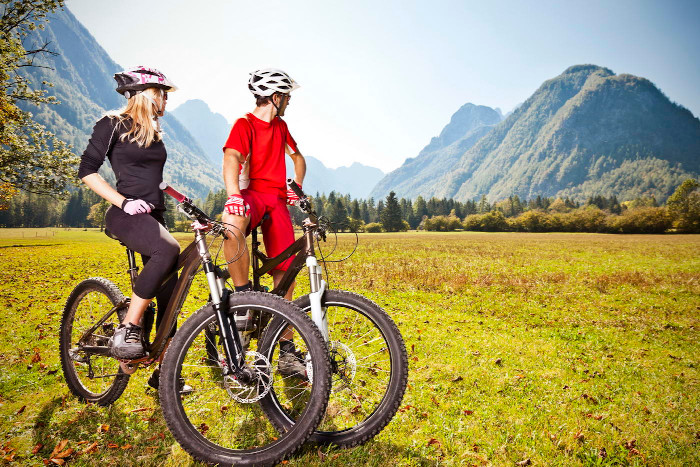

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv("day.csv")

features = ["season", "mnth", "holiday", "weekday", "workingday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]
data.drop(data.columns.difference(features), 1, inplace=True)

C:\Users\Роман Шевчук\AppData\Local\Temp\ipykernel_3044\461973110.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data.columns.difference(features), 1, inplace=True)


In [5]:
rows_count = len(data.index);
train_count = int((rows_count / 10) * 8);

data = data.sample(frac=1).reset_index();

train = data.iloc[:train_count];
test = data.iloc[train_count:(rows_count + 1)].reset_index()

In [6]:
train

index  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0      718       4    12        0        3           1           1  0.332500   
1       18       1     1        0        3           1           2  0.292174   
2      656       4    10        0        4           1           2  0.522500   
3      173       3     6        0        4           1           2  0.728333   
4       23       1     1        0        1           1           1  0.097391   
..     ...     ...   ...      ...      ...         ...         ...       ...   
579    677       4    11        0        4           1           1  0.352174   
580    642       4    10        0        4           1           2  0.657500   
581    405       1     2        0        5           1           2  0.280833   
582    632       4     9        0        1           1           1  0.514167   
583    723       1    12        0        1           1           2  0.231304   

        atemp       hum  windspeed   cnt  
0    0.342162  0.625417   0.184092  5267  
1    0.298422  0.741739   0.208317  1650  
2    0.512625  0.728333   0.236937  7509  
3    0.693833  0.703333   0.238804  4790  
4    0.117930  0.491739   0.158330  1416  
..        ...       ...        ...   ...  
579  0.341891  0.333478   0.347835  5315  
580  0.607975  0.722917   0.117546  7328  
581  0.293558  0.540000   0.116929  3831  
582  0.502513  0.492917   0.142404  7436  
583  0.258900  0.791304   0.077230   920  

[584 rows x 12 columns]

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

**Ответ на последний вопрос**:

    Например, чем больше значение mnth тем больше он бы влиял бы на результат модели, если бы был веществ. признаком,
    но число аренд неравномерно распределено по месяцам(в 12-м месяце их меньше, а в 7 больше) так что это категориальный признак.
    Аналогично с season, holiday, weekday, workingday.

C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found wit

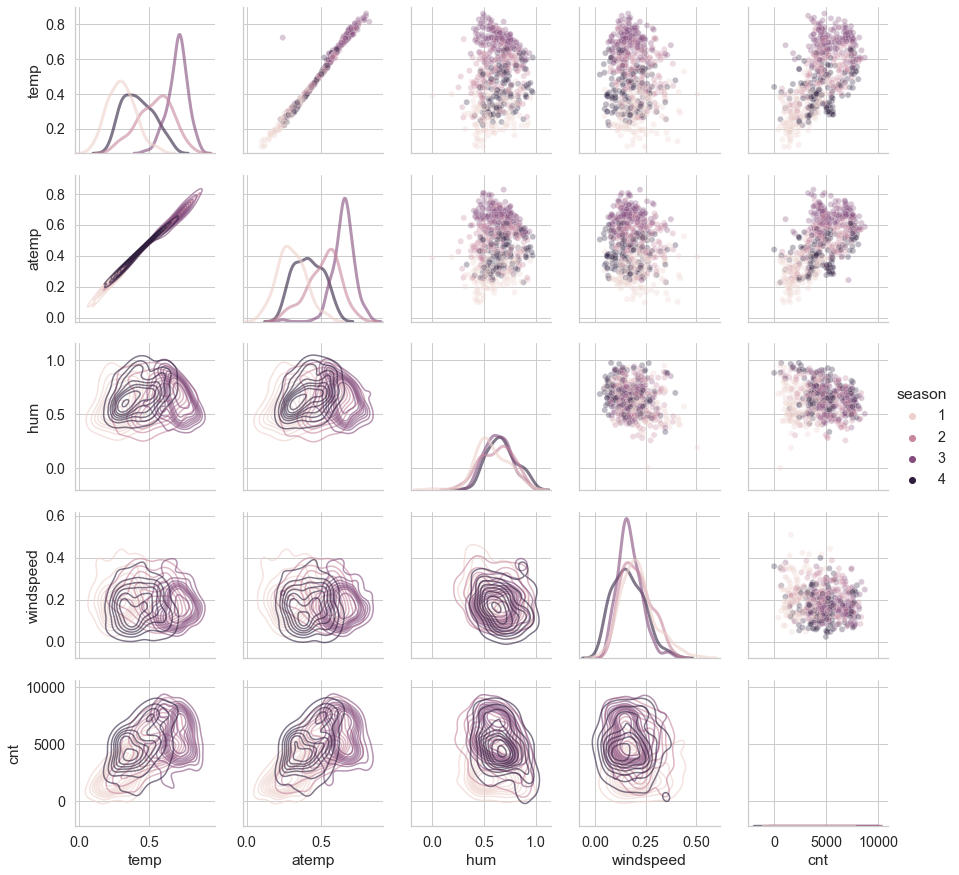

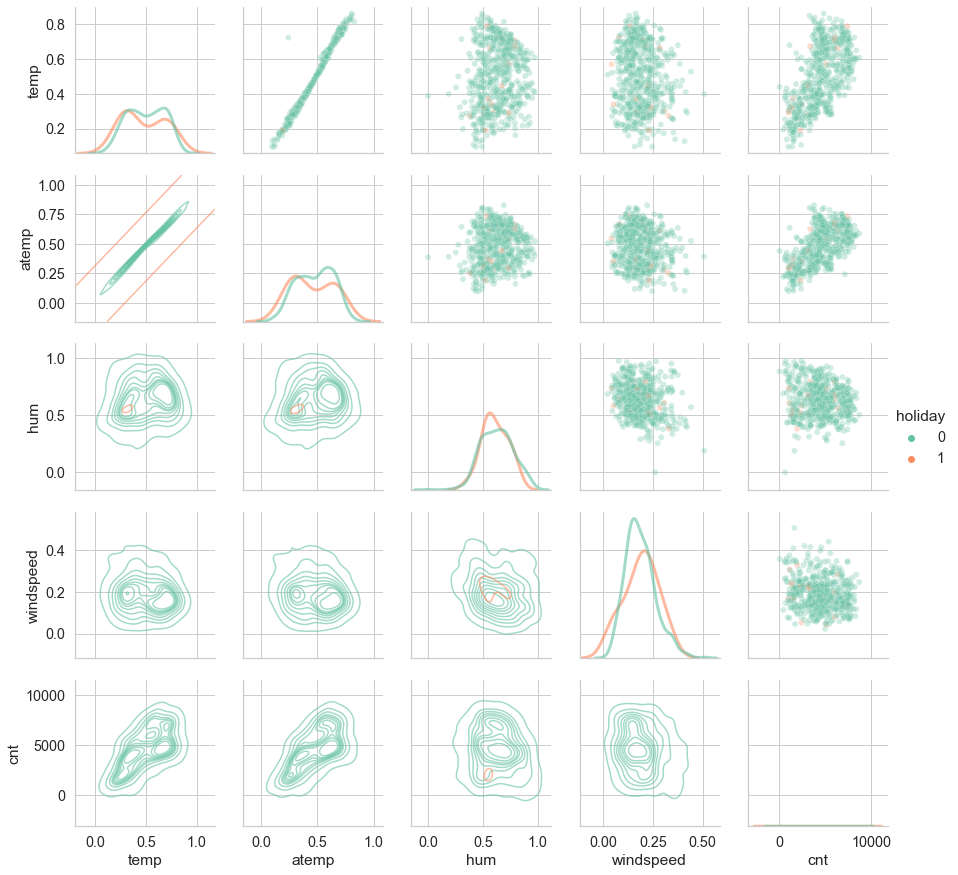

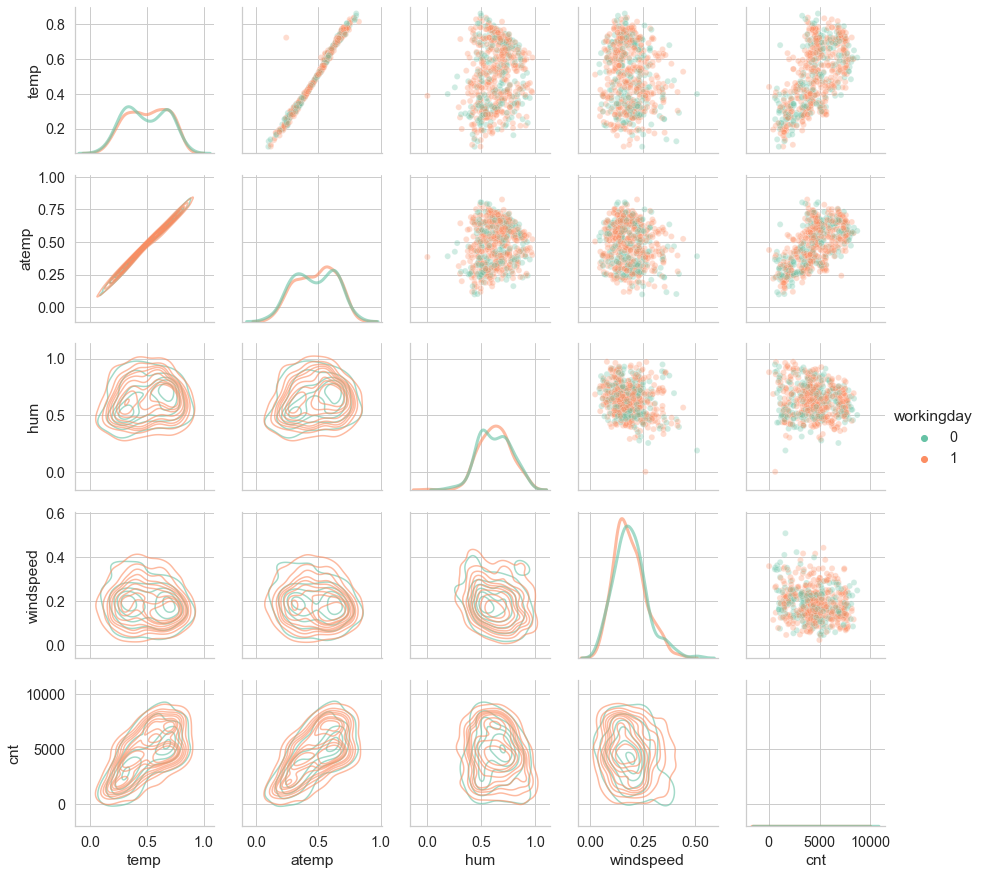

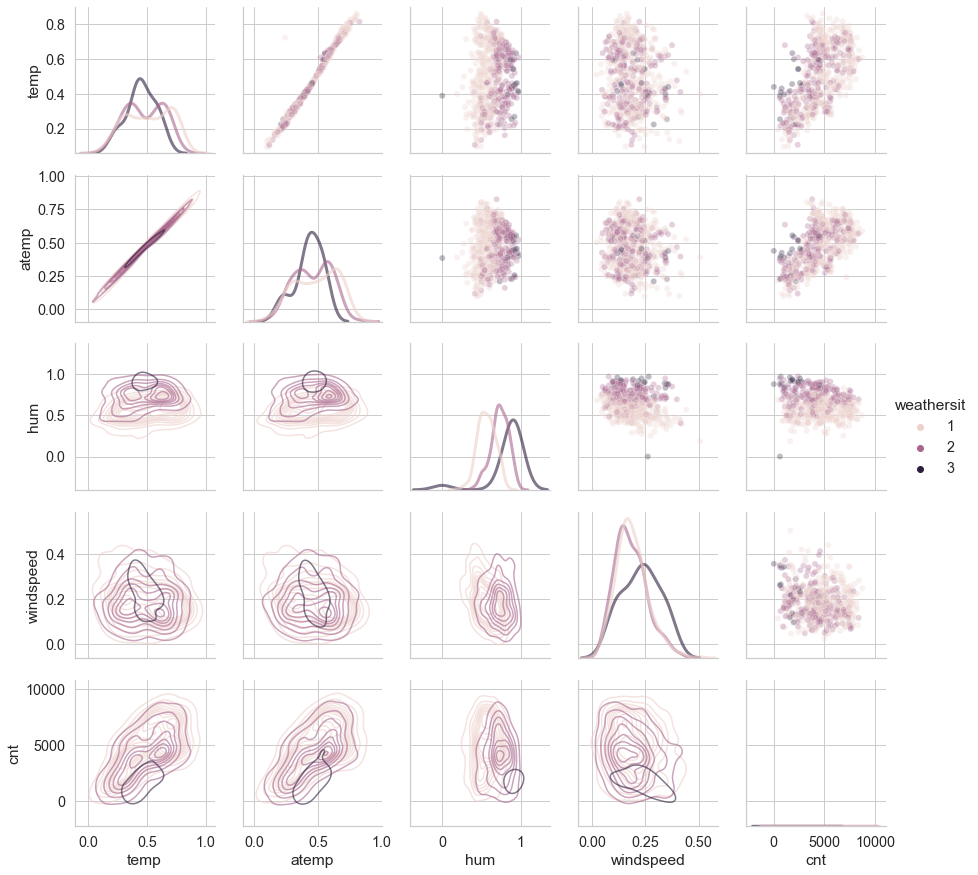

In [7]:
categorial_features = ['season', 'mnth', 'holiday', "weekday", "workingday", "weathersit"]  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

for hue in categorial_features:
    g = sns.PairGrid(train[real_features + [target_feature, hue]], hue=hue)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(sns.scatterplot, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

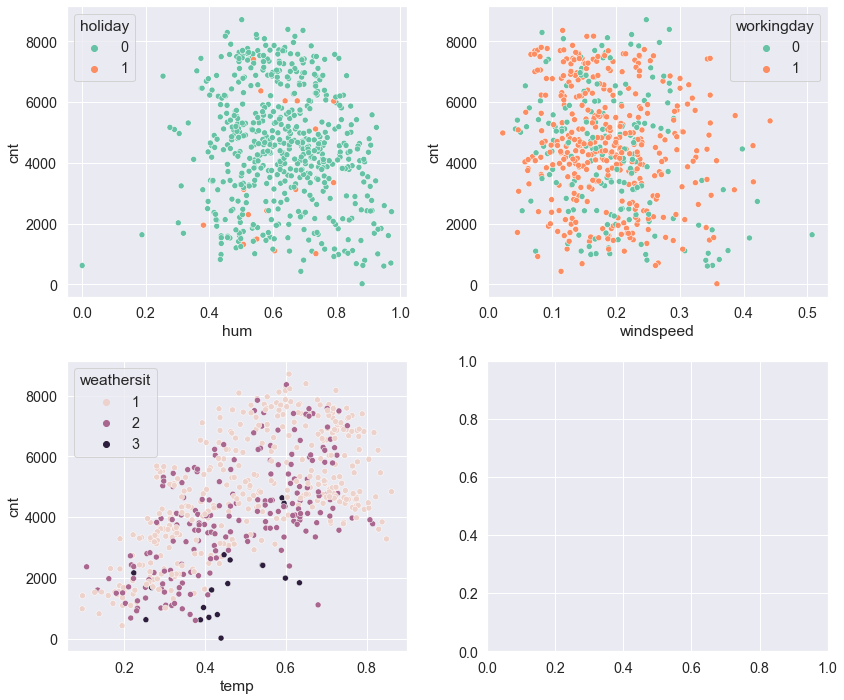

In [8]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(2, 2, figsize=(12,10))
    
    sns.scatterplot(data=train, x="hum", y="cnt", hue="holiday", ax=axes[0][0])
    
    sns.scatterplot(data=train, x="windspeed", y="cnt", hue="workingday", ax=axes[0][1])
    
    sns.scatterplot(data=train, x="temp", y="cnt", hue="weathersit", ax=axes[1][0])
    
    fig.tight_layout()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



In [9]:
tmp = train.copy();

tmp["atemp"] = tmp["atemp"].apply(lambda x: np.round(2*x,decimals=1)*0.5)
tmp["hum"] = tmp["hum"].apply(lambda x: np.round(2*x,decimals=1)*0.5)
tmp["windspeed"] = tmp["windspeed"].apply(lambda x: np.round(2*x,decimals=1)*0.5)

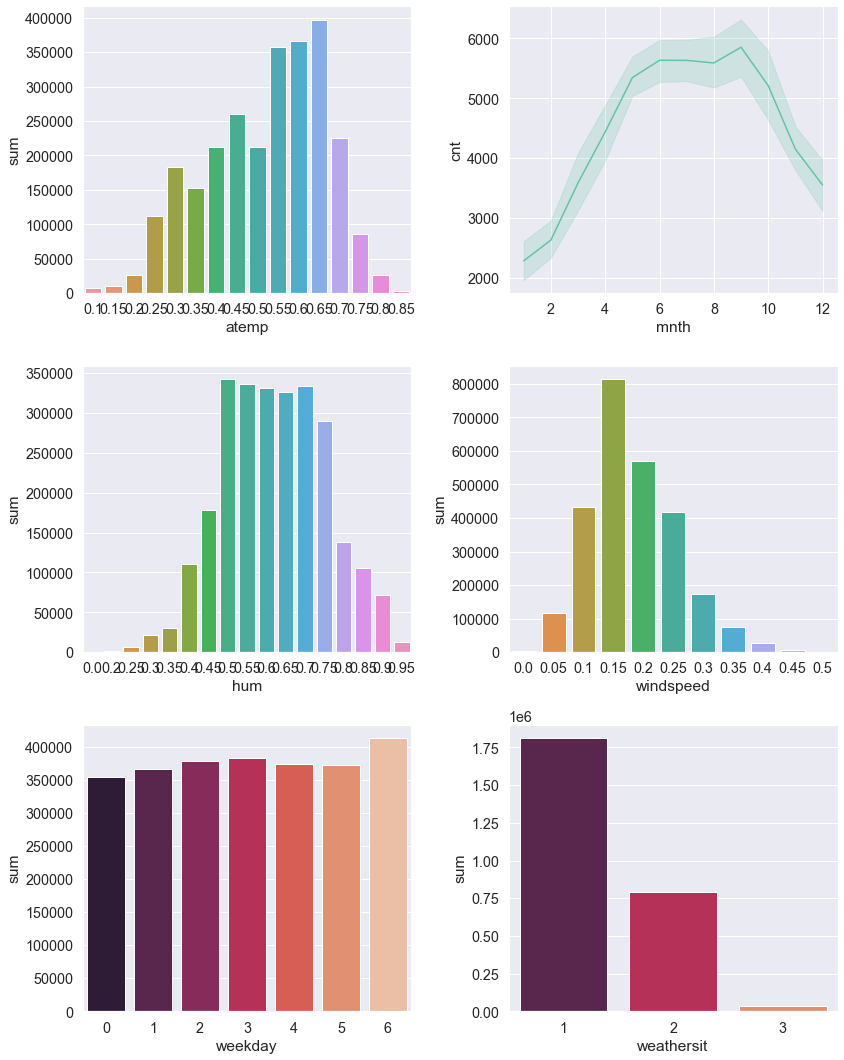

In [10]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(3, 2, figsize=(12,15))
    
    sns.barplot(data=tmp.groupby(["atemp"]).aggregate(["count", "sum"])["cnt"].reset_index(), x="atemp", y="sum", ax=axes[0][0])
    
    sns.barplot(data=tmp.groupby(["hum"]).aggregate(["count", "sum"])["cnt"].reset_index(), x="hum", y="sum", ax=axes[1][0])
    
    sns.barplot(data=tmp.groupby(["windspeed"]).aggregate(["count", "sum"])["cnt"].reset_index(), x="windspeed", y="sum", ax=axes[1][1])
    
    sns.lineplot(data=train, x="mnth", y="cnt", ax=axes[0][1])
    
    sns.barplot(data=tmp.groupby(["weekday"]).aggregate(["count", "sum"])["cnt"].reset_index(), x="weekday", y="sum", palette="rocket", ax=axes[2][0])
    
    sns.barplot(data=tmp.groupby(["weathersit"]).aggregate(["count", "sum"])["cnt"].reset_index(), x="weathersit", y="sum", palette="rocket", ax=axes[2][1])
    
    fig.tight_layout()

Ответ:
 - Выбросы видны на графиках сверху
 - Из графиков видно, что atemp, temp, hum, windspeed, weathersit квадратично влияют на cnt, weekday влияет логарифмически, season влияет как $I\{season > 1\}$, mnth как $I\{season > 2\}$

**Выводы по графикам:**

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Очистка данных от выбросов

**б).** Перевод категориальных признаков в вещественные

Реализуйте данную процедуру.

In [11]:
def ClearDf(df):
    mean_hum = df["hum"].mean();
    std_hum = df["hum"].std();

    mean_wsp = df["windspeed"].mean();
    std_wsp = df["windspeed"].std();

    filter_for_df = ((df['hum'] >= 0.25) & (df['windspeed'] <= 0.4));
    return df[filter_for_df];
tmp = ClearDf(train);

In [12]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

y = train["cnt"];
train = np.hstack([train[real_features], train_cat])
train = np.hstack([train, np.reshape(np.ones(train.shape[0]), (train.shape[0] , 1))])

print(train.shape)

(584, 29)


#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [13]:
model = LinearRegression(fit_intercept=True);
model.fit(train, y);

In [14]:
model.coef_

array([ 5.64529643e+03,  5.20136229e+02, -3.07971295e+03, -2.46101274e+03,
        1.18650011e+03,  1.23725883e+03,  1.76613006e+03,  3.93495434e+01,
        1.37364103e+02, -2.59118902e+02,  3.05452815e+01, -7.74104595e+02,
       -1.02978894e+03, -7.50016344e+02,  3.77049919e+02,  1.60247525e+02,
       -4.39113417e+02, -3.08874804e+02,  9.48110132e+16, -9.48110132e+16,
       -9.48110132e+16, -9.48110132e+16, -9.48110132e+16, -9.48110132e+16,
        5.07648764e+02,  9.48110132e+16, -2.46703214e+02, -2.19615013e+03,
        0.00000000e+00])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [16]:
test_copy = test.copy(deep=True);

y_test = test["cnt"]
test_cat = encoder.transform(test_copy[categorial_features])
test = np.hstack([test_copy[real_features], test_cat])
test = np.hstack([test, np.reshape(np.ones(test.shape[0]), (test.shape[0] , 1))])

test_preds = model.predict(test)

print("RMSE: "+str(np.sqrt(((test_copy[target_feature] - test_preds) ** 2).mean())))
print("MAE: "+str(metrics.mean_absolute_error(test_copy[target_feature], test_preds)))
print("MAPE: "+str(mean_absolute_percentage_error(test_copy[target_feature], test_preds)))

RMSE: 1317.237306878952
MAE: 1132.5036467693633
MAPE: 34.00595197152494


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [20]:
Coef = np.linalg.inv(train.T.dot(train)).dot(train.T).dot(y)
print(Coef)

[ 1.30811604e+06 -1.45016858e+06  1.62603092e+04 -3.68628385e+04
 -1.07612432e+04 -9.04363049e+03  1.62062816e+02  2.77766014e+03
  5.73915437e+03  2.07773760e+04  1.01004279e+04  6.88861964e+03
 -5.32746545e+03 -6.79279239e+03  6.92764725e+03  4.67629284e+03
  5.97394598e+03  1.11351137e+04 -3.75024753e+04  7.85387623e+04
  1.11251607e+05  1.01943953e+05  1.18341643e+05  6.77098563e+04
  5.02561110e+02 -4.16761864e+04 -2.27077618e+02 -2.19227721e+03
  2.97375878e+03]


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [21]:
test_preds = np.matmul(test, np.reshape(Coef, (test.shape[1], 1)));
test_preds = test_preds.flatten();

print("RMSE: "+str(np.sqrt(((y_test - test_preds) ** 2).mean())))
print("MAE: "+str(metrics.mean_absolute_error(y_test, test_preds)))
print("MAPE: "+str(mean_absolute_percentage_error(y_test, test_preds)))

RMSE: 35411.46283838583
MAE: 29676.33774512403
MAPE: 1056.1047588054435


Сделайте выводы.

Удаление выбросов дало неплохой результат на линейной регрессии,

но вот аналитический метод по непонятным причинам потерпел фиаско

**Выводы:**

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

Наша задача: $\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$

Функционал имеет такой матричный вид:

$$ (Y - X\theta)^{T}(Y - X\theta) + \lambda \theta^{T} \theta $$

Найдём градиент от этого выражения, и приравняем его к 0:

$$ (X^{T}X + \lambda E)\theta = X^{T}X, \lambda > 0 $$

Матрица $X^{T}X + \lambda E$ имеет максимальный ранг, следовательно обратима, 
что избавляет нас от проблемы аналитического решения МНК

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

$ \theta^{\prime} $ - параметры с прошлой итерации

$ \alpha $ - learning rate (скорость обучения / размер шага)


**GD_step_ridge($ \theta^{\prime}$):** 
> $ \theta = \theta^{\prime} - \alpha \frac{2}{n}(X^{T}X\theta^{\prime} - Y) + 2\lambda \theta^{\prime} $

$i_1, \dots, i_k \sim U(\{1,\dots,n\})$ - независимые по совокупности случайные величины


$I = \{i_1, \dots, i_k\}$

k - размер батча

**StochasticGD_step_ridge($ \theta^{\prime}$):**
> $ \theta = \theta^{\prime} - \alpha \frac{2}{k}(X^{T}X\theta^{\prime} - Y) + 2\lambda \theta^{\prime} $

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Есть несколько причин для скейлинга:

* Ridge регрессия песимизирует большие коэффициенты, т.е она будет стремится их уменьшить.   
Если изначально features не были стандартизированы, то регрессия может создать между ними ложную зависимость

* Также это может ускорить обучение, т.к градиентному придётся сделать меньше шагов

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

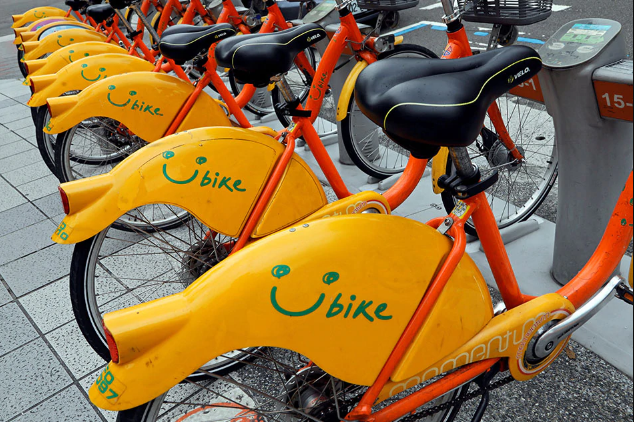

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [ ]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.params = None;
        
        
    def fit(X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        if fit_intercept:
            #added bias
            X = np.hstack([X, np.reshape(np.ones(X.shape[0]), (X.shape[0], 1))]);
        
        self.params = np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ (X.T @ Y)
        
        return self
    
    
    def predict(X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        if fit_intercept:
            #added bias
            X = np.hstack([X, np.reshape(np.ones(X.shape[0]), (X.shape[0], 1))]);
            
        predictions = X @ self.params;
        
        return np.reshape(predictions, (prediction[0]))
    def get_params(self):
        return self.params

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [ ]:
data = pd.read_csv("day.csv")

features = ["season", "mnth", "holiday", "weekday", "workingday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]
data.drop(data.columns.difference(features), 1, inplace=True)

In [ ]:
rows_count = len(data.index);
train_count = int((rows_count / 10) * 6);

data = data.sample(frac=1).reset_index();

train = data.iloc[:train_count];
other = data.iloc[train_count:(rows_count + 1)].reset_index()

test_count = (rows_count - train_count) // 2;
test = other.iloc[:test_count];
validate = other.iloc[test_count:test_count + 1]

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [ ]:
categorial_features = ['season', 'mnth', 'holiday', "weekday", "workingday", "weathersit"]  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

In [ ]:
def ClearDf(df):
    mean_hum = df["hum"].mean();
    std_hum = df["hum"].std();

    mean_wsp = df["windspeed"].mean();
    std_wsp = df["windspeed"].std();

    filter_for_df = ((df['hum'] >= 0.25) & (df['windspeed'] <= 0.4));
    return df[filter_for_df];

train = ClearDf(train);
test = ClearDf(test);
validate = ClearDf(validate);

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

y = train["cnt"];
train = np.hstack([train[real_features], train_cat])
train = np.hstack([train, np.reshape(np.ones(train.shape[0]), (train.shape[0] , 1))])

print(train.shape)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Сделайте выводы.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

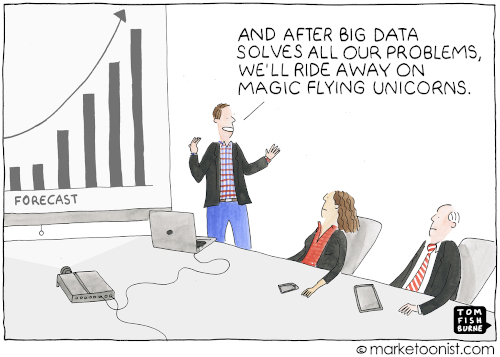

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.